In [ ]:
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import os
import cv2
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.models import Sequential, Model
from keras.layers import Input, Dense, ReLU, LeakyReLU, BatchNormalization
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.optimizers import RMSprop
from keras import initializers
from keras import backend as K
from keras.optimizers import Adam, RMSprop
from tensorflow import keras
from keras import layers
import time
import glob
import imageio

In [ ]:
path = '/content/Dataset'
if not os.path.exists(path):
    ! unzip Dataset
else: 
    print('Already Extracted')

Already Extracted


In [ ]:
# Load the data
data_dir = '/content/Dataset'
class_names = ['1', '2', '3', '4', '5']
num_classes = len(class_names)

# Create a function to load the data
def load_data(data_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_dir = data_dir + '/' + 'Class ' + class_name
        for image_path in tf.io.gfile.glob(class_dir + '/*.png'):
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #, cv2.IMREAD_GRAYSCALE
            res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
            images.append(res)
            labels.append(class_names.index(class_name) + 1)
    return np.array(images), np.array(labels)

In [ ]:
# Load the data
images, labels = load_data(data_dir, class_names)

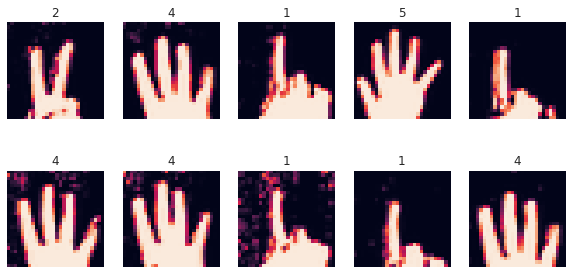

In [ ]:
# Visualize the data
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
i = 0
for num in (np.random.randint(0, len(images), 10)):
    axes[i].imshow(images[num])
    axes[i].set_title(labels[num])
    axes[i].axis('off')
    i += 1
plt.show()

In [ ]:
print('Images shape:', images.shape)
print(images.shape[0], 'train samples')

Images shape: (1005, 28, 28)
1005 train samples


Constructing Generator...
Generator constructed...
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3136)              316736    
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d_9 (UpSampling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 10, 10, 256)       409856    
                                                                 
 batch_normalization_21 (Bat  (None, 10, 10, 256)      1024      
 chNormalization)                                                
                                                                 
 ac

Test: N/A% [                                                   ] ETA:  --:--:--

4/4 [==============================] - 1s 266ms/step


Test: N/A% [                                                   ] ETA:  --:--:--

4/4 [==============================] - 1s 262ms/step


Test:   0% [                                                   ] ETA:   0:48:15

4/4 [==============================] - 1s 268ms/step


Test:   1% [0                                                  ] ETA:   0:34:30

4/4 [==============================] - 1s 265ms/step


Test:   2% [0                                                  ] ETA:   0:29:53

4/4 [==============================] - 2s 422ms/step


Test:   3% [00                                                 ] ETA:   0:27:39

4/4 [==============================] - 1s 267ms/step


Test:   4% [00                                                 ] ETA:   0:26:00

4/4 [==============================] - 1s 272ms/step


Test:   5% [000                                                ] ETA:   0:24:46

4/4 [==============================] - 1s 260ms/step


Test:   6% [000                                                ] ETA:   0:23:49

4/4 [==============================] - 1s 268ms/step


Test:   7% [0000                                               ] ETA:   0:23:04

4/4 [==============================] - 1s 262ms/step


Test:   8% [0000                                               ] ETA:   0:22:26

4/4 [==============================] - 1s 261ms/step


Test:   9% [00000                                              ] ETA:   0:21:53

4/4 [==============================] - 1s 271ms/step


Test:  10% [00000                                              ] ETA:   0:21:35

4/4 [==============================] - 1s 262ms/step


Test:  11% [000000                                             ] ETA:   0:21:09

4/4 [==============================] - 1s 273ms/step


Test:  12% [000000                                             ] ETA:   0:20:52

4/4 [==============================] - 1s 267ms/step


Test:  13% [0000000                                            ] ETA:   0:20:28

4/4 [==============================] - 1s 264ms/step


Test:  14% [0000000                                            ] ETA:   0:20:05

4/4 [==============================] - 1s 264ms/step


Test:  15% [00000000                                           ] ETA:   0:19:43

4/4 [==============================] - 1s 269ms/step


Test:  16% [00000000                                           ] ETA:   0:19:24

4/4 [==============================] - 1s 258ms/step


Test:  17% [000000000                                          ] ETA:   0:19:05

4/4 [==============================] - 1s 264ms/step


Test:  18% [000000000                                          ] ETA:   0:18:46

4/4 [==============================] - 1s 261ms/step


Test:  19% [0000000000                                         ] ETA:   0:18:29

4/4 [==============================] - 1s 262ms/step


Test:  20% [0000000000                                         ] ETA:   0:18:19

4/4 [==============================] - 1s 266ms/step


Test:  21% [00000000000                                        ] ETA:   0:18:01

4/4 [==============================] - 1s 260ms/step


Test:  22% [00000000000                                        ] ETA:   0:17:44

4/4 [==============================] - 1s 267ms/step


Test:  23% [000000000000                                       ] ETA:   0:17:27

4/4 [==============================] - 1s 265ms/step


Test:  24% [000000000000                                       ] ETA:   0:17:10

4/4 [==============================] - 1s 265ms/step


Test:  25% [0000000000000                                      ] ETA:   0:16:55

4/4 [==============================] - 1s 263ms/step


Test:  26% [0000000000000                                      ] ETA:   0:16:42

4/4 [==============================] - 1s 266ms/step


Test:  27% [00000000000000                                     ] ETA:   0:16:26

4/4 [==============================] - 1s 265ms/step


Test:  28% [00000000000000                                     ] ETA:   0:16:10

4/4 [==============================] - 1s 265ms/step


Test:  29% [000000000000000                                    ] ETA:   0:15:55

4/4 [==============================] - 1s 267ms/step


Test:  30% [000000000000000                                    ] ETA:   0:15:42

4/4 [==============================] - 1s 267ms/step


Test:  31% [0000000000000000                                   ] ETA:   0:15:27

4/4 [==============================] - 1s 263ms/step


Test:  32% [0000000000000000                                   ] ETA:   0:15:12

4/4 [==============================] - 1s 265ms/step


Test:  33% [00000000000000000                                  ] ETA:   0:14:57

4/4 [==============================] - 1s 265ms/step


Test:  34% [00000000000000000                                  ] ETA:   0:14:42

4/4 [==============================] - 1s 263ms/step


Test:  35% [000000000000000000                                 ] ETA:   0:14:27

4/4 [==============================] - 1s 265ms/step


Test:  36% [000000000000000000                                 ] ETA:   0:14:13

4/4 [==============================] - 1s 269ms/step


Test:  37% [0000000000000000000                                ] ETA:   0:13:58

4/4 [==============================] - 1s 270ms/step


Test:  38% [0000000000000000000                                ] ETA:   0:13:44

4/4 [==============================] - 1s 265ms/step


Test:  39% [00000000000000000000                               ] ETA:   0:13:30

4/4 [==============================] - 1s 266ms/step


Test:  40% [00000000000000000000                               ] ETA:   0:13:17

4/4 [==============================] - 1s 265ms/step


Test:  41% [000000000000000000000                              ] ETA:   0:13:05

4/4 [==============================] - 1s 267ms/step


Test:  42% [000000000000000000000                              ] ETA:   0:12:51

4/4 [==============================] - 1s 266ms/step


Test:  43% [0000000000000000000000                             ] ETA:   0:12:36

4/4 [==============================] - 1s 259ms/step


Test:  44% [0000000000000000000000                             ] ETA:   0:12:22

4/4 [==============================] - 1s 265ms/step


Test:  45% [00000000000000000000000                            ] ETA:   0:12:09

4/4 [==============================] - 1s 266ms/step


Test:  46% [00000000000000000000000                            ] ETA:   0:11:55

4/4 [==============================] - 1s 262ms/step


Test:  47% [000000000000000000000000                           ] ETA:   0:11:41

4/4 [==============================] - 1s 268ms/step


Test:  48% [000000000000000000000000                           ] ETA:   0:11:27

4/4 [==============================] - 1s 265ms/step


Test:  49% [0000000000000000000000000                          ] ETA:   0:11:14

4/4 [==============================] - 1s 263ms/step


Test:  50% [0000000000000000000000000                          ] ETA:   0:11:01

4/4 [==============================] - 1s 272ms/step


Test:  51% [00000000000000000000000000                         ] ETA:   0:10:48

4/4 [==============================] - 1s 265ms/step


Test:  52% [00000000000000000000000000                         ] ETA:   0:10:34

4/4 [==============================] - 1s 270ms/step


Test:  53% [000000000000000000000000000                        ] ETA:   0:10:20

4/4 [==============================] - 1s 266ms/step


Test:  54% [000000000000000000000000000                        ] ETA:   0:10:07

4/4 [==============================] - 2s 470ms/step


Test:  55% [0000000000000000000000000000                       ] ETA:   0:09:55

4/4 [==============================] - 1s 264ms/step


Test:  56% [0000000000000000000000000000                       ] ETA:   0:09:41

4/4 [==============================] - 1s 265ms/step


Test:  57% [00000000000000000000000000000                      ] ETA:   0:09:27

4/4 [==============================] - 1s 266ms/step


Test:  58% [00000000000000000000000000000                      ] ETA:   0:09:14

4/4 [==============================] - 1s 264ms/step


Test:  59% [000000000000000000000000000000                     ] ETA:   0:09:00

4/4 [==============================] - 1s 263ms/step


Test:  60% [000000000000000000000000000000                     ] ETA:   0:08:48

4/4 [==============================] - 1s 266ms/step


Test:  61% [0000000000000000000000000000000                    ] ETA:   0:08:34

4/4 [==============================] - 1s 262ms/step


Test:  62% [0000000000000000000000000000000                    ] ETA:   0:08:21

4/4 [==============================] - 1s 263ms/step


Test:  63% [00000000000000000000000000000000                   ] ETA:   0:08:07

4/4 [==============================] - 1s 271ms/step


Test:  64% [00000000000000000000000000000000                   ] ETA:   0:07:54

4/4 [==============================] - 1s 263ms/step


Test:  65% [000000000000000000000000000000000                  ] ETA:   0:07:41

4/4 [==============================] - 1s 265ms/step


Test:  66% [000000000000000000000000000000000                  ] ETA:   0:07:27

4/4 [==============================] - 1s 261ms/step


Test:  67% [0000000000000000000000000000000000                 ] ETA:   0:07:14

4/4 [==============================] - 1s 264ms/step


Test:  68% [0000000000000000000000000000000000                 ] ETA:   0:07:00

4/4 [==============================] - 1s 261ms/step


Test:  69% [00000000000000000000000000000000000                ] ETA:   0:06:48

4/4 [==============================] - 1s 262ms/step


Test:  70% [00000000000000000000000000000000000                ] ETA:   0:06:35

4/4 [==============================] - 1s 262ms/step


Test:  71% [000000000000000000000000000000000000               ] ETA:   0:06:21

4/4 [==============================] - 1s 259ms/step


Test:  72% [000000000000000000000000000000000000               ] ETA:   0:06:08

4/4 [==============================] - 1s 261ms/step


Test:  73% [0000000000000000000000000000000000000              ] ETA:   0:05:55

4/4 [==============================] - 1s 266ms/step


Test:  74% [0000000000000000000000000000000000000              ] ETA:   0:05:43

4/4 [==============================] - 1s 271ms/step


Test:  75% [00000000000000000000000000000000000000             ] ETA:   0:05:30

4/4 [==============================] - 1s 268ms/step


Test:  76% [00000000000000000000000000000000000000             ] ETA:   0:05:16

4/4 [==============================] - 1s 271ms/step


Test:  77% [000000000000000000000000000000000000000            ] ETA:   0:05:03

4/4 [==============================] - 1s 269ms/step


Test:  78% [000000000000000000000000000000000000000            ] ETA:   0:04:50

4/4 [==============================] - 1s 265ms/step


Test:  79% [0000000000000000000000000000000000000000           ] ETA:   0:04:36

4/4 [==============================] - 1s 265ms/step


Test:  80% [0000000000000000000000000000000000000000           ] ETA:   0:04:23

4/4 [==============================] - 1s 266ms/step


Test:  81% [00000000000000000000000000000000000000000          ] ETA:   0:04:10

4/4 [==============================] - 1s 265ms/step


Test:  82% [00000000000000000000000000000000000000000          ] ETA:   0:03:56

4/4 [==============================] - 1s 265ms/step


Test:  83% [000000000000000000000000000000000000000000         ] ETA:   0:03:43

4/4 [==============================] - 1s 274ms/step


Test:  84% [000000000000000000000000000000000000000000         ] ETA:   0:03:30

4/4 [==============================] - 1s 266ms/step


Test:  85% [0000000000000000000000000000000000000000000        ] ETA:   0:03:17

4/4 [==============================] - 1s 264ms/step


Test:  86% [0000000000000000000000000000000000000000000        ] ETA:   0:03:04

4/4 [==============================] - 1s 265ms/step


Test:  87% [00000000000000000000000000000000000000000000       ] ETA:   0:02:50

4/4 [==============================] - 1s 268ms/step


Test:  88% [00000000000000000000000000000000000000000000       ] ETA:   0:02:37

4/4 [==============================] - 1s 265ms/step


Test:  89% [000000000000000000000000000000000000000000000      ] ETA:   0:02:24

4/4 [==============================] - 1s 267ms/step


Test:  90% [000000000000000000000000000000000000000000000      ] ETA:   0:02:11

4/4 [==============================] - 1s 264ms/step


Test:  91% [0000000000000000000000000000000000000000000000     ] ETA:   0:01:58

4/4 [==============================] - 1s 262ms/step


Test:  92% [0000000000000000000000000000000000000000000000     ] ETA:   0:01:45

4/4 [==============================] - 1s 261ms/step


Test:  93% [00000000000000000000000000000000000000000000000    ] ETA:   0:01:31

4/4 [==============================] - 1s 268ms/step


Test:  94% [00000000000000000000000000000000000000000000000    ] ETA:   0:01:18

4/4 [==============================] - 1s 260ms/step


Test:  95% [000000000000000000000000000000000000000000000000   ] ETA:   0:01:05

4/4 [==============================] - 1s 266ms/step


Test:  96% [000000000000000000000000000000000000000000000000   ] ETA:   0:00:52

4/4 [==============================] - 1s 268ms/step


Test:  97% [0000000000000000000000000000000000000000000000000  ] ETA:   0:00:39

4/4 [==============================] - 1s 271ms/step


Test: 100% [000000000000000000000000000000000000000000000000000] Time:  0:21:39


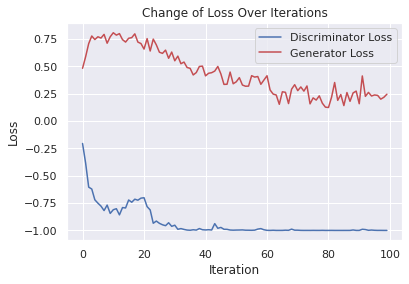

In [28]:
import numpy as np
import keras
import seaborn as sns
sns.set()
from progressbar import ProgressBar
from progressbar import Bar, ETA, Percentage
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Reshape, UpSampling2D, BatchNormalization, LeakyReLU, ZeroPadding2D
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras import optimizers
from keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt
import keras.backend as K
import random


class WGAN():

	def __init__(self):
		self.image_rows = 28
		self.image_cols = 28
		self.channels = 1
		self.image_shape = (self.image_rows, self.image_cols, self.channels)

		# Our noise representation dimensions.
		self.latent_dimensions = 100

		self.discriminator_iterations = 5

		# Optimizer to be used for both the generator and discriminator.
		self.optimizer = Adam(0.0001, beta_1=0.5, beta_2=0.9)

		# Build both the generator and discriminator.
		self.generator = self.build_generator()
		self.discriminator = self.build_discriminator()

		#########################
		#   Constructing GAN 
		#########################
		self.GAN = Sequential()
		self.GAN.add(self.generator)
		self.discriminator.trainable = False
		self.GAN.add(self.discriminator)
		self.GAN.compile(loss=self.wasserstein_loss, optimizer=self.optimizer)


	def build_generator(self):
		
		print('Constructing Generator...')

		#########################
		#   Creating generator  
		#########################
		generator = Sequential()
		
		# Conv2DTranspose seemed to give bad results.

		# UpSampling and applying a consecutive Conv layers seems to remove 'checkerboard' generated images.
			# https://distill.pub/2016/deconv-checkerboard/
		generator.add(Dense(7*7*64, activation="relu", input_shape=(self.latent_dimensions,)))
		generator.add(Reshape((7,7,64)))

		# Upsample to increase image dimensions(Generative Portion).
		generator.add(UpSampling2D())
		# Apply convolution in hope of generalizing features.
		generator.add(Conv2D(filters=256, kernel_size=(5,5), padding="VALID"))
		# Transformation that maintains mean close to 0 and standard deviation close to 1.
			# Momentum helps converge to 'optima' faster.
		generator.add(BatchNormalization(momentum=0.8))
		generator.add(Activation("relu"))

		generator.add(UpSampling2D())
		generator.add(Conv2D(filters=128, kernel_size=(5,5), padding="VALID"))
		generator.add(BatchNormalization(momentum=0.8))
		generator.add(Activation("relu"))

		generator.add(UpSampling2D())
		generator.add(Conv2D(filters=64, kernel_size=(4,4), padding="VALID"))
		generator.add(BatchNormalization(momentum=0.8))
		generator.add(Activation("relu"))

		generator.add(Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding="VALID", activation="tanh"))
	
		print('Generator constructed...')
		generator.summary()
					
		return generator

					
	
	def build_discriminator(self):
		
		print('Constructing Discriminator...')
					
		#########################
		# Creating Discriminator  
		#########################
		discriminator = Sequential()

		discriminator.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), padding="VALID", input_shape=self.image_shape))
		discriminator.add(LeakyReLU(alpha=0.2))
		discriminator.add(Dropout(0.20))

		discriminator.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same"))
		discriminator.add(BatchNormalization(momentum=0.8))
		discriminator.add(LeakyReLU(alpha=0.2))
		discriminator.add(Dropout(0.30))

		discriminator.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same"))
		discriminator.add(BatchNormalization(momentum=0.8))
		discriminator.add(LeakyReLU(alpha=0.2))
		discriminator.add(Dropout(0.40))

		discriminator.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding="same"))
		discriminator.add(BatchNormalization(momentum=0.8))
		discriminator.add(LeakyReLU(alpha=0.2))
		discriminator.add(Dropout(0.30))

		discriminator.add(Conv2D(256, kernel_size=(2,2), strides=(1,1), padding="same"))
		discriminator.add(BatchNormalization(momentum=0.8))
		discriminator.add(LeakyReLU(alpha=0.2))
		discriminator.add(Dropout(0.30))

		discriminator.add(Flatten())
		# Fully connected layer             
		discriminator.add(Dense(1, activation='sigmoid'))
						
		# Sigmoid for binary classification (real = 1 or fake = 0)
		# discriminator.add(Activation('sigmoid'))

		discriminator.compile(loss=self.wasserstein_loss, optimizer=self.optimizer)
		print('Discriminator constructed...')
		discriminator.summary()
		
		return discriminator
	
	# Using Wasserstein Loss as it shows promising results.
		# https://arxiv.org/pdf/1701.07875.pdf
	def wasserstein_loss(self, y_true, y_pred):
		#y_true and y_pred are tensors and thus tensor computations are needed.
		# K.mean (keras.backend) takes mean of tensor.
		return K.mean(y_true * y_pred)

				
	def resize_image_data(self, X_train):
		# Rescales to [-1, 1], helps when updating gradients (Smaller window to move through, previously [0,255]).       
		X_train = (X_train.astype(np.float32) - 127.5) / 127.5
		X_train = np.expand_dims(X_train, axis=3)
		return X_train
						
	def train(self, epochs, batch_size=100, save_interval=100): 
		# Used to create a progress bar for the epochs forloop.
		widgets = ['Test: ', Percentage(), ' ',Bar(marker='0',left='[',right=']'), ' ', ETA()]
		pbar = ProgressBar(widgets=widgets, maxval=epochs+1)
		
		discriminator_losses = []
		generator_losses = []

		# Normalization:
			# Load dataset and resize images for model.
		X_train, _ = images, labels
		X_train = self.resize_image_data(X_train)

		# TODO: Possibly implement soft/noisy labels. Salimans et. al. 2016
		real_labels  =  np.ones((batch_size,1))
		fake_labels  = -np.ones((batch_size,1))
		
		pbar.start()
		for epoch in range(epochs):
			# WassersteinGAN from original paper used a 1:5 (generator:discriminator) training ratio.
			for _ in range(self.discriminator_iterations):
				#########################
				#  Train Discriminator 
				#########################

				# Grab batch of images from training data.
				real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

				# TODO: Possibly add noise to inputs, decaying overtime.
				# Sample noise from gaussian(normal) distribution to feed into generator.
				noise = np.random.normal(0, 1, (batch_size, self.latent_dimensions))   
				fake_images = self.generator.predict(noise)

				self.discriminator.trainable = True
				# Found that when training on seperate real and fake batches, performance increased.
				real_loss = self.discriminator.train_on_batch(real_images, real_labels)
				fake_loss = self.discriminator.train_on_batch(fake_images, fake_labels)
				total_loss = real_loss + fake_loss

			discriminator_losses.append(total_loss)

			#########################
			#    Train Generator 
			#########################
			self.discriminator.trainable = False
			# Train generator with random sampled noise and also real labels in an attempt to trick discriminator.
			GAN_loss = self.GAN.train_on_batch(noise, real_labels)
			generator_losses.append(GAN_loss)

			# Plot the progress
			pbar.update(epoch)
			# print ("Epoch: %d [D loss: %f] [G loss: %f]" % (epoch, total_loss, GAN_loss))

			if epoch % save_interval == 0:
				self.save_images(epoch)
		pbar.finish()
		self.save_models()
		self.plot_loss(discriminator_losses, generator_losses)

	def save_models(self):
		self.discriminator.save("d_model")
		self.GAN.layers[0].save("g_model")
		self.GAN.save("GAN_model")

	def plot_loss(self, discriminator_losses, generator_losses):
		plt.plot(discriminator_losses, color='b', label="Discriminator Loss")
		plt.plot(generator_losses, color='r', label="Generator Loss")
		plt.legend(loc="upper right")
		plt.title("Change of Loss Over Iterations")
		plt.xlabel("Iteration")
		plt.ylabel("Loss")
		plt.show()

	def save_images(self, epoch):
		# Creating 25 images to be displayed in a 5x5 image.
		noise = np.random.normal(0, 1, (25, self.latent_dimensions))
		generated_images = self.generator.predict(noise)

		# Rescale images 0 - 1
		generated_images = 0.5 * generated_images + 1

		fig, axs = plt.subplots(5, 5)
		cnt = 0
		for i in range(5):
			for j in range(5):
				axs[i,j].imshow(generated_images[cnt, :,:,0], cmap='gray')
				axs[i,j].axis('off')
				cnt += 1
		fig.savefig("images2/mnist_%d.png" % epoch)
		plt.close()
											 
						
						
model = WGAN()
model.train(1000)

In [29]:
!zip -r /content/file.zip /content/images2

  adding: content/images2/ (stored 0%)
  adding: content/images2/mnist_20.png (deflated 6%)
  adding: content/images2/mnist_60.png (deflated 7%)
  adding: content/images2/mnist_90.png (deflated 9%)
  adding: content/images2/mnist_50.png (deflated 7%)
  adding: content/images2/mnist_30.png (deflated 7%)
  adding: content/images2/mnist_10.png (deflated 5%)
  adding: content/images2/mnist_70.png (deflated 8%)
  adding: content/images2/mnist_80.png (deflated 7%)
  adding: content/images2/mnist_0.png (deflated 5%)
  adding: content/images2/mnist_40.png (deflated 7%)
